# `pandas dtypes` 

In [Section 1.1](./1_1_introduction_to_pandas.ipynb), we took our first look at the `pandas.DataFrame`.  In this section, we will take a closer look at `pandas` column types.

In [1]:
import pandas as pd
from dfply import *

In [2]:
pd.set_option("display.max_columns", None)

## Hiding stack traceback

We hide the exception traceback for didactic reasons (code source: [see this post](https://stackoverflow.com/questions/46222753/how-do-i-suppress-tracebacks-in-jupyter)).  Don't run this cell if you want to see a full traceback.

## Outline

* Three more `dtypes`
    * `datetime`
    * `Int64`
    * `category`
* Setting the `dtypes` at read time.

## Integers with missing values

* Older `pandas` $\rightarrow$ no missing `int`
    * Use `float` instead
* Latest version $\rightarrow$ `Int` classes
    * Notice the capital `I`

## Example - Artist `BeginDate` and `EndDate`

In [3]:
artist = pd.read_csv('./data/Artists.csv')
artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## There are lots of `0`s in the `BeginDate` 

Do we really think the Museam of **Modern** Art has artists from 0AD?

<AxesSubplot:>

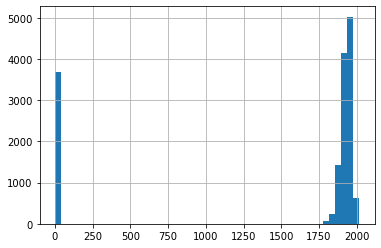

In [4]:
import matplotlib.pylab as plt
%matplotlib inline
artist.BeginDate.hist(bins=50)

## Same problem with `EndDate`, but even more so

<AxesSubplot:>

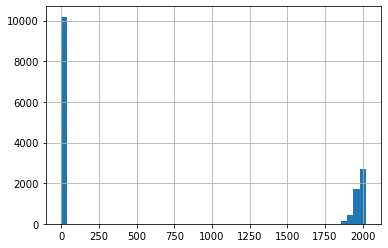

In [5]:
artist.EndDate.hist(bins=50)

## Using `apply` to remove the `0`s

In [6]:
transformed_BD = artist.BeginDate.apply(lambda val: np.nan if val == 0 else val)
transformed_BD.head()

0    1930.0
1    1936.0
2    1941.0
3    1946.0
4    1941.0
Name: BeginDate, dtype: float64

## What's up with the `float dtype`?

Good question, let's find out.

## Converting transformed `BeginDate` - attempt 1

Let's try to convert the `BeginDate` to `int`

In [7]:
transformed_BD.astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## `pandas`, `int` and `np.nan` don't mix

* `pandas` `int` columns **cannot** have missing
* `pd.__version__ == 0.24.1` fixes this
    * Use `Int64` for integers with missing values
    * Note the capital `I`
* Update with `!pip install --upgrade pandas`

In [8]:
assert pd.__version__.startswith('1') or pd.__version__.startswith('0.24'), "Please upgrade your pandas and restart jupyter"
#!pip install --upgrade pandas

## Converting `BeginDate` to `Int64`

Hmm, that returned a `float` column.  Let's try to force `Int64`

In [9]:
transformed_BD.astype('Int64').head(15) # There we go!

0     1930
1     1936
2     1941
3     1946
4     1941
5     1925
6     1941
7     1923
8     1918
9     1886
10    1936
11    1911
12    1907
13    1900
14    <NA>
Name: BeginDate, dtype: Int64

## Downloading the 538 Uber FOIA data

The [Uber dataset from 538](https://github.com/fivethirtyeight/uber-tlc-foil-response) is too large to include in this module's repository.  If you haven't already downloaded the Uber data, execute the following.

!git clone https://github.com/fivethirtyeight/uber-tlc-foil-response ./data/uber

## Example 2 - Uber rides

**Source:** [FiveThirtyEight Uber data](https://github.com/fivethirtyeight/uber-tlc-foil-response)

**Note:** The actual data is pretty large, which we will deal with in the next section.  For now, we will load a subset (first 1000 rows).

In [10]:
uber_april_raw = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-apr14.csv")
uber_april_raw.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## <font color="red"> Exercise 1</font>

Fix the names.  Be sure to rename the `"Date/Time"` `'date'` and name the resulting data frame `uber_april_renamed`.

In [11]:
uber_april_renamed = uber_april_raw.rename(columns={"Date/Time":"date",
                                                    "Lat": "Latitude",
                                                    "Lon":"Longitude",
                                                    "Base":"BaseCode"}, inplace=False)
uber_april_renamed.head()

,date,Latitude,Longitude,BaseCode
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [12]:
uber_april_raw.head() # See, we didn't touch the original

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## <font color="red"> Exercise 2</font>

**Tasks:**

1. Inspect the `dtypes`
2. Suggest a good type for the `date` column

In [13]:
uber_april_renamed.dtypes

date          object
Latitude     float64
Longitude    float64
BaseCode      object
dtype: object

datetime64

## Changing to date type with  `pd.to_datetime`

In [14]:
pd.to_datetime(uber_april_renamed.date.head())

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: date, dtype: datetime64[ns]

## Making a `dfply` compatible column function.

Suppose you have a function you want to use inside `mutate` (i.e. a **column function**).  To make this function compatable with `dfply.Intention`s, you should 

1. Wrap the `pandas` call inside a function.
2. Decorate with `@make_symbolic`

In [15]:
@make_symbolic
def to_datetime(series, infer_datetime_format=True):
    return pd.to_datetime(series, infer_datetime_format=infer_datetime_format)

## Converting to dates with `dfply`

Note that above function is available in `more_dfply.to_datetime` is a `dfply` compatible version of `pd.to_datetime`.

!pip install more_dfply

In [16]:
from more_dfply import to_datetime
uber_april = (uber_april_renamed >>
                mutate(date = to_datetime(X.date)))
uber_april.dtypes

date         datetime64[ns]
Latitude            float64
Longitude           float64
BaseCode             object
dtype: object

## Why convert to `datetime`?

This series type provides many useful date methods and attributes.  For example, we get many **dateparts methods** in the `dt` attribute.

In [17]:
uber_april_weekday = (uber_april 
                          >> mutate(weekday = X.date.dt.day_name()))
uber_april_weekday.head()

,date,Latitude,Longitude,BaseCode,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday


## <font color="red"> Exercise 3</font>

**Tasks:**

1. Use `dir` to inspect the dateparts found in `dt`
2. Add a few more datepart columns.
3. Name the resulting dataframe `uber_april_datepart`

In [18]:
dir(uber_april.date.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [19]:
uber_april_datepart = (uber_april_weekday
                           >> mutate(day_index = X.date.dt.weekday,
                                     hour = X.date.dt.hour)
                      )
uber_april_datepart.sample(10)

,date,Latitude,Longitude,BaseCode,weekday,day_index,hour
556609,2014-04-06 11:44:00,40.7507,-73.9860,B02764,Sunday,6,11
477670,2014-04-21 16:42:00,40.7258,-73.9965,B02682,Monday,0,16
154945,2014-04-23 16:48:00,40.7236,-74.0027,B02598,Wednesday,2,16
319142,2014-04-29 19:17:00,40.7608,-73.9830,B02617,Tuesday,1,19
412930,2014-04-11 19:28:00,40.7707,-73.8655,B02682,Friday,4,19
26782,2014-04-24 19:11:00,40.7551,-73.9839,B02512,Thursday,3,19
123184,2014-04-17 18:48:00,40.7556,-73.9709,B02598,Thursday,3,18
968,2014-04-01 22:07:00,40.7151,-74.0079,B02512,Tuesday,1,22
44134,2014-04-03 06:23:00,40.7236,-74.0000,B02598,Thursday,3,6
8690,2014-04-07 18:17:00,40.7556,-73.9754,B02512,Monday,0,18


## Specifying date columns while reading

Pass a list of date columns to `parse_dates`

In [20]:
uber_april_with_datetime = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-apr14.csv", 
                                       parse_dates=['Date/Time'])

uber_april_with_datetime.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

## Explicit date parsing

* Create a parser function
* Pass to `date_parser`
* Use if `pandas` fails to parse
* More information about format codes [here](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [21]:
dateparse = lambda x: pd.to_datetime(x, format = "%m/%d/%Y %H:%M:%S") # had to update
uber_april_parsered = pd.read_csv('./data/uber/uber-trip-data/uber-raw-data-apr14.csv', 
                              parse_dates=['Date/Time'],
                              date_parser=dateparse)
uber_april_parsered.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


## Categorical dtype

* Similar to `R`s factor
* Allows for nominal or ordinal categories

In [22]:
uber_april_weekday_cat = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype('category')))
uber_april_weekday_cat.dtypes

date         datetime64[ns]
Latitude            float64
Longitude           float64
BaseCode             object
weekday            category
dtype: object

## Let's plot the weekdays with `seaborn.catplot`

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

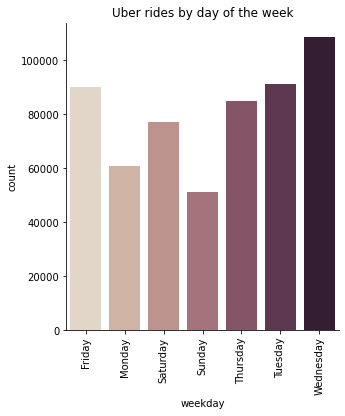

In [24]:
weekday_plot = sns.catplot( x="weekday", 
                            kind="count", 
                            palette="ch:.25", 
                            data=uber_april_weekday_cat)
# set title and rotate the long x labels
_ = weekday_plot.ax.set_title("Uber rides by day of the week")
_ = weekday_plot.ax.set_xticklabels(weekday_plot.ax.get_xticklabels(),rotation=90)

## Nominal by default

* Setting `'category'` makes this nominal
* Weekdays are actually ordinal
* Notice the alphabetical order in the plot.

## Making the data ordinal

1. Make a new category class with `CategoricalDtype`
2. Use `astype` with your new dtype class

#### Making an order weekday category

In [25]:
from calendar import day_name
list(day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [26]:
weekday_categories = pd.CategoricalDtype(categories=list(day_name),
                                     ordered=True)
weekday_categories

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

#### Changing to our custom type

In [27]:
uber_april_weekday_ord = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype(weekday_categories)))
uber_april_weekday_ord.dtypes

date         datetime64[ns]
Latitude            float64
Longitude           float64
BaseCode             object
weekday            category
dtype: object

## Plot the ordinal weekdays with `seaborn.catplot`

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

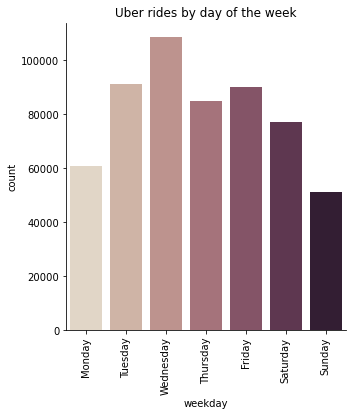

In [28]:
import seaborn as sns
ordered_plot = sns.catplot( x="weekday", 
                            kind="count", 
                            palette="ch:.25", 
                            data=uber_april_weekday_ord)
# rotate the long x labels
ordered_plot.ax.set_title("Uber rides by day of the week")
ordered_plot.ax.set_xticklabels(ordered_plot.ax.get_xticklabels(),rotation=90)

## <font color="red"> Exercise 4</font>

Sometimes there is an advantage to treating calendar years as ordinal data.  Perform the following steps on the `Artist` data loaded above.

**Tasks:**

1. Remove the `0` from `BeginDate` and switch the type to `Int64`.
2. Filter out the rows that are missing `BeginDate`
3. Determine the minimum and maximum values of the filtered `BeginDate`s
4. Create a new ordinal category class for this date range.
5. Use `sns.catplot` to plot the distribution of the dates.

In [29]:
artist_cleaned = (artist
                      >> mutate(BeginDate = X.BeginDate.apply(lambda val: np.nan if val == 0 else val).astype("Int64"))
                      >> filter_by(X.BeginDate.notna())
                 )
artist_cleaned.head(15)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
5,6,Danilo Aroldi,"Italian, born 1925",Italian,Male,1925,0,NaN,NaN
6,7,Bill Aron,"American, born 1941",American,Male,1941,0,NaN,NaN
7,9,David Aronson,"American, born Lithuania 1923",American,Male,1923,0,Q5230870,500003363.0
8,10,Irene Aronson,"American, born Germany 1918",American,Female,1918,0,Q19748568,500042413.0
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,Male,1886,1966,Q153739,500031000.0


In [30]:
artist_cleaned.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          Int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [31]:
min(artist_cleaned.BeginDate), max(artist_cleaned.BeginDate)

(1181, 2017)

In [32]:
yearly_categories = pd.CategoricalDtype(categories = list(range(1181, 2018))) # ordered because they're numbers
# Due to large range of values, the plot is very hard to read. We might consider breaking it up into groups:
# yearly_categories = pd.CategoricalDtype(categories=list(range(1181, 2018, 25)))
yearly_categories

CategoricalDtype(categories=[1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190,
                  ...
                  2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
, ordered=False)

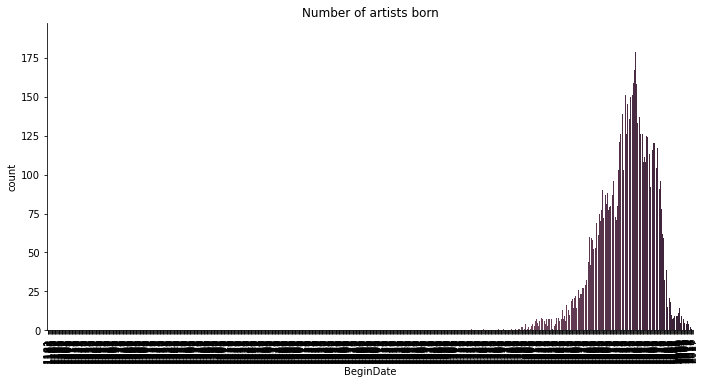

In [33]:
my_plot = sns.catplot( x="BeginDate", 
                            kind="count", 
                            palette="ch:.25", 
                            data=(artist_cleaned >> mutate(BeginDate = X.BeginDate.astype(yearly_categories))),
                            aspect=2 # width = 2x the height, to give us more room due to all the categories
                     )

_=my_plot.ax.set_title("Number of artists born")
_=my_plot.ax.set_xticklabels(my_plot.ax.get_xticklabels(),rotation=90)